<a href="https://colab.research.google.com/github/subhobrata/Tensorflow_Livelession/blob/master/Creating_Word_Vectors_with_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [0]:
from nltk.corpus import gutenberg

In [5]:
len(gutenberg.fileids())

18

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [0]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [8]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [9]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [10]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [11]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [0]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [13]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [14]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [15]:
gberg_sents[4][14]

'father'

In [16]:
# another convenient method that we don't immediately need: 
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [0]:
# gutenberg.words() is analogous to the following line, which need not be run: 
# word_tokenize(gutenberg.raw())

In [18]:
# our Gutenberg corpus is 2.6m words in length: 
len(gutenberg.words())

2621613

In [0]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [0]:
model.save('raw_gutenberg_model.w2v')

In [0]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [22]:
model['dog']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.08141449,  0.584405  , -0.01423377,  0.10496875,  0.05420024,
        0.2108484 ,  0.43925807, -0.1323421 ,  0.20422778, -0.37482628,
        0.33882746,  0.05386456, -0.396741  , -0.21366604,  0.08808102,
       -0.12179429,  0.0978017 ,  0.28218758, -0.36565492,  0.13686474,
        0.350884  ,  0.13710818, -0.35272697,  0.2496267 ,  0.1960764 ,
        0.21359958,  0.35242978,  0.2026604 , -0.12909015,  0.23877601,
       -0.10343619, -0.42445228, -0.56897295,  0.26733056,  0.19875766,
        0.12522589,  0.08494497,  0.22794993,  0.20221722, -0.13647573,
        0.00569613,  0.3048076 , -0.29359314, -0.48828158,  0.03752774,
       -0.188021  , -0.59112513,  0.26214993,  0.37151563, -0.29268774,
       -0.1642652 , -0.08477705,  0.18471861, -0.5845882 , -0.32117534,
        0.1192256 ,  0.47807118, -0.22272718,  0.09988581, -0.21431361,
        0.36643645,  0.36234725,  0.45206234,  0.17793266], dtype=float32)

In [23]:
len(model['dog'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

In [24]:
model.most_similar('dog') # distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('puppy', 0.8436874151229858),
 ('cage', 0.7878674268722534),
 ('thief', 0.7870998382568359),
 ('sweeper', 0.7675108909606934),
 ('shell', 0.7635195851325989),
 ('pet', 0.7566508054733276),
 ('pig', 0.7555921673774719),
 ('broth', 0.7536599636077881),
 ('wid', 0.7405183911323547),
 ('paw', 0.7386873960494995)]

In [25]:
model.most_similar('think')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('suppose', 0.8834503293037415),
 ('contradict', 0.8483031988143921),
 ('know', 0.832356333732605),
 ('manage', 0.8320337533950806),
 ('downright', 0.8275266885757446),
 ('_you_', 0.8187811374664307),
 ('NOW', 0.8141156435012817),
 ('hesitate', 0.8115568161010742),
 ('argue', 0.8107999563217163),
 ('believe', 0.809725821018219)]

In [26]:
model.most_similar('day')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('morning', 0.8031513690948486),
 ('night', 0.7505239248275757),
 ('time', 0.7417669296264648),
 ('month', 0.7306579947471619),
 ('evening', 0.6915850043296814),
 ('week', 0.6810147166252136),
 ('sabbath', 0.6752506494522095),
 ('fourteenth', 0.6651261448860168),
 ('morrow', 0.6633752584457397),
 ('feasting', 0.6627945303916931)]

In [27]:
model.most_similar('father')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.8709344267845154),
 ('brother', 0.8376826643943787),
 ('sister', 0.8015507459640503),
 ('wife', 0.789371907711029),
 ('Amnon', 0.7778525948524475),
 ('daughter', 0.761387050151825),
 ('uncle', 0.7473379373550415),
 ('master', 0.7376050353050232),
 ('bondwoman', 0.7351594567298889),
 ('Tamar', 0.7314128875732422)]

In [28]:
model.doesnt_match("mother father daughter dog".split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'dog'

In [29]:
model.similarity('father', 'dog')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.448734

In [30]:
# close, but not quite; distinctly in female direction: 
model.most_similar(positive=['father', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wife', 0.7716318964958191),
 ('sister', 0.769746720790863),
 ('mother', 0.7691130042076111),
 ('husband', 0.7488479018211365),
 ('Sarah', 0.7317615747451782),
 ('daughter', 0.7284269332885742),
 ('Sarai', 0.7171691656112671),
 ('conceived', 0.710349977016449),
 ('brother', 0.7053003311157227),
 ('Rachel', 0.6951186060905457)]

In [31]:
# more confident about this one: 
model.most_similar(positive=['son', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Sarah', 0.7568422555923462),
 ('Leah', 0.747453510761261),
 ('conceived', 0.7417783141136169),
 ('Sarai', 0.7405890822410583),
 ('Hagar', 0.7393109798431396),
 ('Bethuel', 0.7353020310401917),
 ('wife', 0.7328977584838867),
 ('daughter', 0.7259103059768677),
 ('Abram', 0.7248380184173584),
 ('Bilhah', 0.7215892672538757)]

In [32]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wife', 0.7336432933807373),
 ('sister', 0.7031130790710449),
 ('conceived', 0.7031000256538391),
 ('child', 0.6832740902900696),
 ('mother', 0.6653128266334534),
 ('daughter', 0.6442315578460693),
 ('maid', 0.6372463703155518),
 ('nurse', 0.6269129514694214),
 ('widow', 0.6172206401824951),
 ('Sarai', 0.6121191382408142)]

In [33]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Sarah', 0.7502699494361877),
 ('Rachel', 0.7199457287788391),
 ('Hagar', 0.694178581237793),
 ('Sarai', 0.6892136335372925),
 ('Laban', 0.6890163421630859),
 ('Leah', 0.6861414909362793),
 ('Bethuel', 0.6784533262252808),
 ('Rebekah', 0.6783608198165894),
 ('Pharaoh', 0.6781425476074219),
 ('Solomon', 0.6753072738647461),
 ('Abram', 0.6713058948516846),
 ('Ephron', 0.6688727736473083),
 ('Bilhah', 0.6679369211196899),
 ('damsel', 0.6613219976425171),
 ('Padanaram', 0.6598522663116455),
 ('Uriah', 0.657139003276825),
 ('Mephibosheth', 0.6525305509567261),
 ('Hamor', 0.6515820026397705),
 ('Esau', 0.6489148139953613),
 ('conceived', 0.644103467464447),
 ('birthright', 0.6436141133308411),
 ('Zilpah', 0.6422765254974365),
 ('Onan', 0.637199342250824),
 ('Jerubbaal', 0.6343064308166504),
 ('princes', 0.6340264081954956),
 ('David', 0.6337710022926331),
 ('ministered', 0.6316065788269043),
 ('Heth', 0.6312795877456665),
 ('concubine', 0.6263620257377625),
 ('Hittite', 0.6262199282646179)

In [34]:
len(model.wv.vocab)

17011

In [35]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [0]:
X_2d = tsne.fit_transform(X)

In [38]:
X_2d[0:5]

array([[ 55.874844 , -15.022596 ],
       [  9.8161335, -61.328606 ],
       [-45.869446 , -37.368633 ],
       [  6.5967755, -63.03068  ],
       [ 55.811314 , -15.017893 ]], dtype=float32)

In [0]:
# create DataFrame for storing results and plotting
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [40]:
coords_df.head()

,x,y,token
0,55.874844,-15.022596,[
1,9.816133,-61.328606,Emma
2,-45.869446,-37.368633,by
3,6.596776,-63.030682,Jane
4,55.811314,-15.017893,]


In [0]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

In [0]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

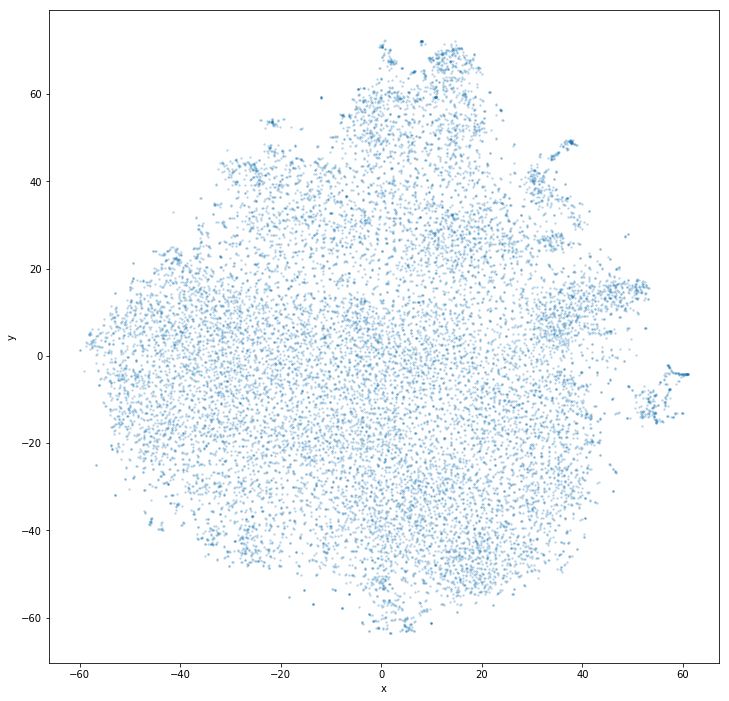

In [43]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [44]:
output_notebook() # output bokeh plots inline in notebook

Loading BokehJS ...

In [0]:
subset_df = coords_df.sample(n=5000)

In [0]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [47]:
show(p)